# **Rani Son**

## **Problem 2 R**



## **An Statistical Analysis of Adults**

## **First, I will inport the testing and training data with various aspects of loan data such as approvals, debt-to-income ratio, FICO score, etc.**

In [ ]:
library(readr)
loan_train <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW6/Loans_Training.csv", show_col_types = FALSE)
loan_test <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW6/Loans_Test.csv", show_col_types = FALSE)


## **These are the libraries I will use in the data analysis, the first is for C50 and the second is for CART.**

In [ ]:
# libraies for C50
install.packages("C50")
library(C50)
# libraries for CART
library(rpart)
install.packages("rpart.plot")
library(rpart.plot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## **Firstly, I just want a view of the data I imported.**

In [ ]:
summary(loan_train)

  Approval       Debt-to-Income Ratio   FICO Score  Request Amount 
 Mode :logical   Min.   :0.0000       Min.   :371   Min.   :  500  
 FALSE:75066     1st Qu.:0.0900       1st Qu.:647   1st Qu.: 6000  
 TRUE :75236     Median :0.1600       Median :684   Median :11000  
                 Mean   :0.1835       Mean   :672   Mean   :13427  
                 3rd Qu.:0.2400       3rd Qu.:714   3rd Qu.:19000  
                 Max.   :1.0300       Max.   :869   Max.   :44000  
    Interest    
 Min.   :  225  
 1st Qu.: 2700  
 Median : 4950  
 Mean   : 6042  
 3rd Qu.: 8550  
 Max.   :19800  

In [ ]:
summary(loan_test)

  Approval       Debt-to-Income Ratio   FICO Score    Request Amount 
 Mode :logical   Min.   :0.0000       Min.   :372.0   Min.   :  500  
 FALSE:24934     1st Qu.:0.0900       1st Qu.:647.0   1st Qu.: 6000  
 TRUE :24764     Median :0.1600       Median :684.0   Median :11000  
                 Mean   :0.1831       Mean   :672.3   Mean   :13413  
                 3rd Qu.:0.2400       3rd Qu.:714.0   3rd Qu.:19000  
                 Max.   :1.0500       Max.   :866.0   Max.   :42000  
    Interest    
 Min.   :  225  
 1st Qu.: 2700  
 Median : 4950  
 Mean   : 6036  
 3rd Qu.: 8550  
 Max.   :18900  

## **I noticed that the Approval section is logical, but to prepare it for model building it needs to be a factor so I will change it with the factor method.**

In [ ]:
loan_train$Approval <- as.factor(loan_train$Approval)
loan_test$Approval <- as.factor(loan_test$Approval)

## **Now I need the formula that will be used to build the model. Approval or the target will be determined by the predictors, Debt-to-income Ratio and FICO Score.**

In [ ]:
formula <- Approval ~ `Debt-to-Income Ratio` + `FICO Score`

## **After determining the formula I plan to use, now I can create the CART model using the rpart library that I also imported earlier.**

In [ ]:
CART <- rpart(formula, loan_train, method = "class")

## **This section explains the summary of the CART model. It tells me that of the two predictors I chose, FICO score is of 74% importance while dept-to-income variable is 26%.**

In [ ]:
summary(CART)

Call:
rpart(formula = formula, data = loan_train, method = "class")
  n= 150302 

         CP nsplit rel error    xerror        xstd
1 0.5646498      0 1.0000000 1.0024112 0.002582312
2 0.1267551      1 0.4353502 0.4353369 0.002130369
3 0.0100000      2 0.3085951 0.3091280 0.001866091

Variable importance
          FICO Score Debt-to-Income Ratio 
                  74                   26 

Node number 1: 150302 observations,    complexity param=0.5646498
  predicted class=TRUE   expected loss=0.4994345  P(node) =1
    class counts: 75066 75236
   probabilities: 0.499 0.501 
  left son=2 (46002 obs) right son=3 (104300 obs)
  Primary splits:
      FICO Score           < 659.5 to the left,  improve=28208.770, (0 missing)
      Debt-to-Income Ratio < 0.305 to the right, improve= 8986.886, (0 missing)
  Surrogate splits:
      Debt-to-Income Ratio < 1.005 to the right, agree=0.694, adj=0, (0 split)

Node number 2: 46002 observations
  predicted class=FALSE  expected loss=0.03930264  P(nod

## **After creating the model, the next step is giving it the testing data to see how well the model can predict based on the training data I had fed it.**

In [ ]:
predictions <- predict(cart_model, newdata = loan_test, type = "class")

## **Finally, I can display the decision tree model based on the prediction. As I saw earlier, FICO score had a much higher importance than debt-to-income and thus is the parent node in the tree. If the FICO score is lower than 660 then the tree stops, but if it is higher, another lead node is created based on debt-to income ratio.**

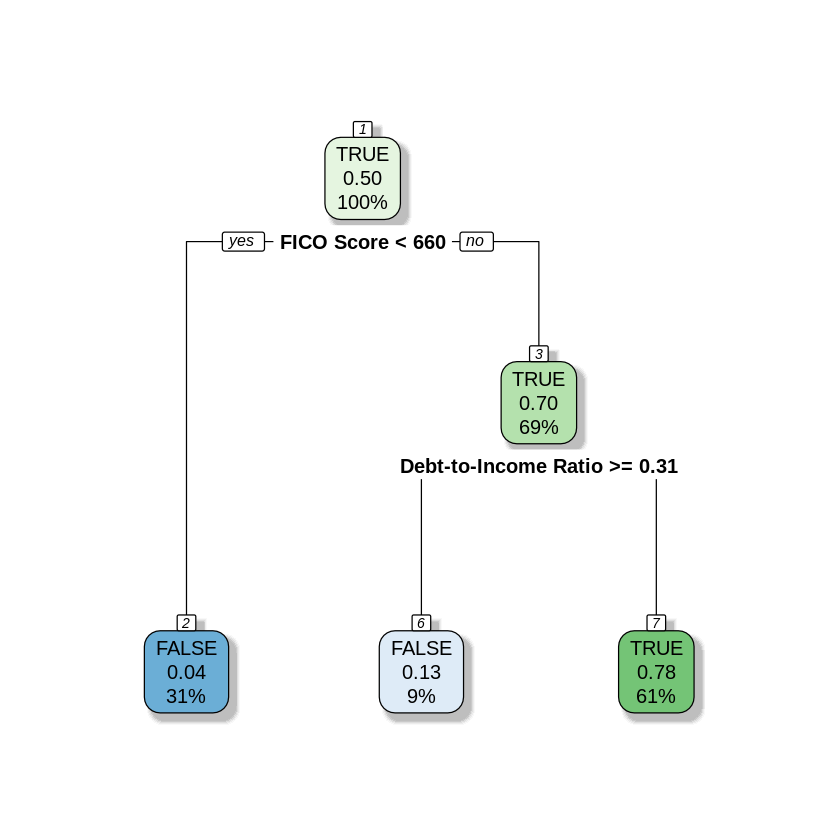

In [ ]:
rpart.plot(cart_model, box.palette = "auto", shadow.col = "gray", nn = TRUE)

## **Lastly, here is the confusion matrix based on the predication model and based on it I can see that from the main diagonal, the amount of true positives and true negatives and much higher than the other diagonal.**

In [ ]:
table(predictions, loan_test$Approval)

           
predictions FALSE  TRUE
      FALSE 18314  1171
      TRUE   6620 23593

# ***Now on the 2nd part of problem 2, in which I will build a C5.0 model of the training and testing data.***

## **First, I will take the predicators and target categories and place them in input and output variables. The input varaible contains all the columns and rows of the debt-to-income and FICO score values. The output contains teh approval values.**

In [ ]:
input <- loan_train[, 2:3]
output <- loan_train$Approval
summary(input)

 Debt-to-Income Ratio   FICO Score 
 Min.   :0.0000       Min.   :371  
 1st Qu.:0.0900       1st Qu.:647  
 Median :0.1600       Median :684  
 Mean   :0.1835       Mean   :672  
 3rd Qu.:0.2400       3rd Qu.:714  
 Max.   :1.0300       Max.   :869  

## **The C5 model requires an outcome variable that is a factor so I want to make sure I have the correct variable for output.**

In [ ]:
str(output)
summary(output)

 Factor w/ 2 levels "FALSE","TRUE": 1 1 1 1 1 1 1 1 1 1 ...


FALSE  TRUE 
75066 75236

## **After making sure the input and output variables are correct, I can build the C5.0 model and make sure that there is a minimal cases of 1000 per terminal node.**

In [ ]:
C5model <- C5.0(input, output, control = C5.0Control(noGlobalPruning = FALSE, minCases=1000))
summary(C5model)


Call:
C5.0.default(x = input, y = output, control = C5.0Control(noGlobalPruning
 = FALSE, minCases = 1000))


C5.0 [Release 2.07 GPL Edition]  	Mon Dec 11 00:50:49 2023
-------------------------------

Class specified by attribute `outcome'

Read 150302 cases (3 attributes) from undefined.data

Decision tree:

Debt-to-Income Ratio > 0.31: FALSE (19884/1160)
Debt-to-Income Ratio <= 0.31:
:...FICO Score <= 655: FALSE (35346/894)
    FICO Score > 655:
    :...FICO Score <= 669:
        :...FICO Score <= 661: FALSE (3827/1547)
        :   FICO Score > 661: TRUE (6858/2622)
        FICO Score > 669:
        :...Debt-to-Income Ratio <= 0.25: TRUE (75846/13356)
            Debt-to-Income Ratio > 0.25:
            :...Debt-to-Income Ratio <= 0.27: TRUE (3369/1144)
                Debt-to-Income Ratio > 0.27:
                :...Debt-to-Income Ratio <= 0.29: TRUE (2865/1275)
                    Debt-to-Income Ratio > 0.29: FALSE (2307/1094)


Evaluation on training data (150302 cases):

	    D

## **Here is where the model *should be*, however, I cannot fix the error so I will still examine what the tree should show from the summary. The first split in this tree is based on whether the Debt-to-income ratio is less than or greater than or equal to 0.31. After that, the tree has a decision to split on whether the FICO score is equal or less than 669 or greater than 669. The tree grows out to 8 nodes.**

In [ ]:
#plot(C5model, main="C5.0 Decision Tree - Pruned")

## **Here I am making the prediciton for the testing data on the C5 model.**

In [ ]:
newdata <- loan_test[,c(1:3)]

prediction <- predict(C5model, newdata, type="class")

## **Lastly, I use a confusion matrix on the predication. It is fairly simliar to the results obtained from the CART model.**

In [ ]:
table(prediction, loan_test$Approval)

          
prediction FALSE  TRUE
     FALSE 18742  1559
     TRUE   6192 23205

# ***Similarities and Differences***

## **One immediate difference between the two model are the parent nodes of each. For the CART model the parent node was split based on the FICO score because of the importance it gave it. The C5 model found the Debt-to-income variable to be more important. Another difference is the amount of nodes created from the trees The C5 model had a length of 8 while the CART model stopped at 7 according to the summary. Despite the difference they both closely the same results for the confusion matrixes**

## **They should be close, as the only difference between the two models is the way they measure pruity. CART uses Gini index while C5 uses entropy and when we look at a graph of entropy and Gini, we see that Gini represents the same data of entropy, but on a smaller scale. Thus the results of the confusion matrix of both model being similar make sense.**